<a href="https://colab.research.google.com/github/Bibek257/Machine-Learning-And-Data-sci/blob/main/Titanic/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Importing all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [70]:
# Importing dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Display the first few rows to verify
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
df.shape

(891, 12)

In [72]:
# Checking Null values
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [73]:
# Dropping non-required column
df.drop(columns=['Cabin'], inplace=True)

In [74]:
# Checking average age
df['Age'].mean()

np.float64(29.69911764705882)

In [75]:
# Checking most repeated age
df['Age'].mode()

,Age
0,24.0


In [76]:
# Since we can't drop all null values of the age column so it is better to add a mean value in that column.
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [77]:
# Checking if we still have null values
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [78]:
df.dropna(inplace=True)

In [79]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [80]:
# Making sure we removed only null rows
df.shape

(889, 11)

In [81]:
# Checking if we have any duplicate values
df.duplicated().sum()

np.int64(0)

Since data cleaning is done now, we can move towards visualisation

In [82]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Survived,Sex'>

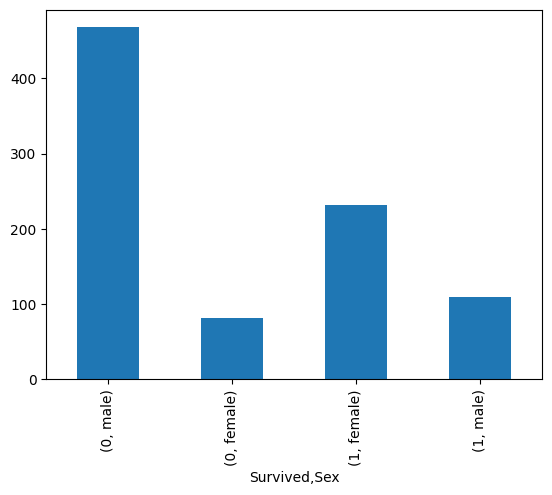

In [83]:
df.groupby('Survived')['Sex'].value_counts().plot(kind='bar')


**The survival rate of females is undoubtedly higher than males.**

<Axes: xlabel='Survived,Pclass'>

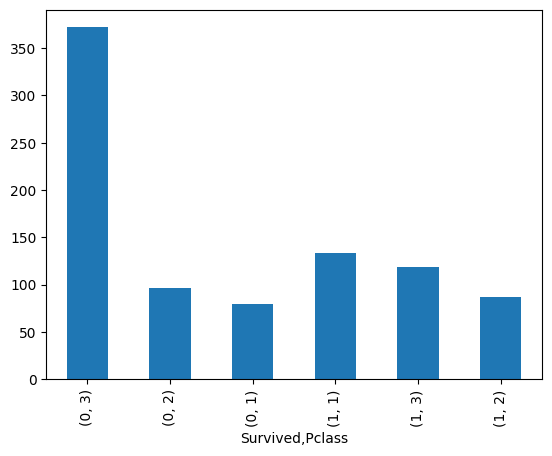

In [84]:
df.groupby('Survived')['Pclass'].value_counts().plot(kind='bar')

**Passenger in third class has the highest death rate among all, and passenger in first class has higher number of survivals**

<Axes: xlabel='Survived,Embarked'>

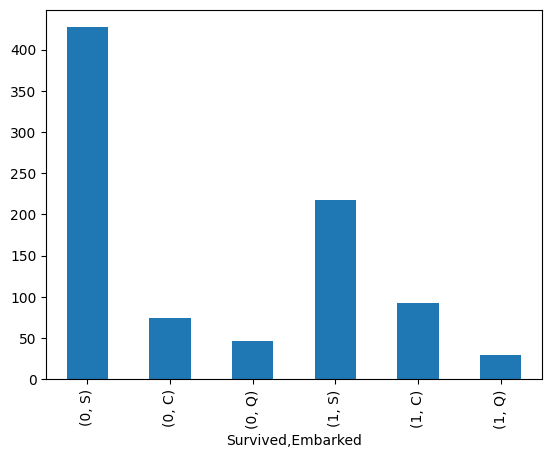

In [85]:
df.groupby('Survived')['Embarked'].value_counts().plot(kind='bar')

The output shows the count of passengers who survived (1) or did not survive (0), grouped by their embarkation port (S for Southampton, C for Cherbourg, Q for Queenstown).

- **Survived = 0 (Did not survive):**
  - **S:** 427 passengers
  - **C:** 75 passengers
  - **Q:** 47 passengers

- **Survived = 1 (Survived):**
  - **S:** 217 passengers
  - **C:** 93 passengers
  - **Q:** 30 passengers

This indicates that a larger number of passengers who embarked from Southampton did not survive, while a relatively higher proportion of those who embarked from Cherbourg survived compared to those from Southampton or Queenstown.


<Axes: xlabel='Survived,Parch'>

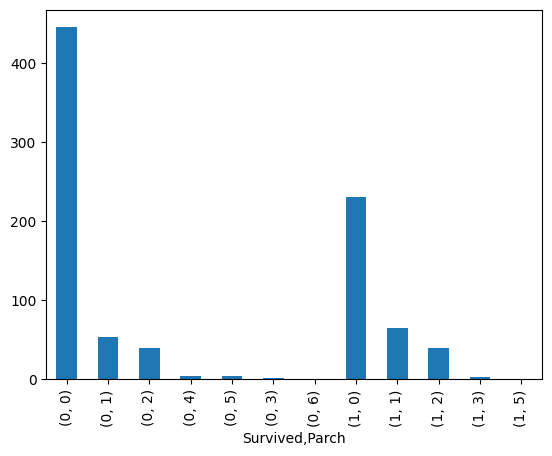

In [86]:
df.groupby('Survived')['Parch'].value_counts().plot(kind='bar')

The output shows the count of passengers who survived (1) or did not survive (0), grouped by the number of parents/children they had onboard (Parch).

- **Total Passengers = 889** (after dropping rows with null values and duplicate values)
- **Did Not Survive (Survived = 0): 549 passengers**
- **Survived (Survived = 1): 340 passengers**

Breakdown by Parch:
- **Survived = 0 (Did not survive):**
  - **0 Parch:** 445 passengers
  - **1 Parch:** 53 passengers
  - **2 Parch:** 40 passengers
  - **3 Parch:** 2 passengers
  - **4 Parch:** 4 passengers
  - **5 Parch:** 4 passengers
  - **6 Parch:** 1 passenger

- **Survived = 1 (Survived):**
  - **0 Parch:** 233 passengers
  - **1 Parch:** 65 passengers
  - **2 Parch:** 40 passengers
  - **3 Parch:** 3 passengers
  - **5 Parch:** 1 passenger

This shows that the majority of both survivors and non-survivors had 0 parents/children onboard. Passengers with 1 or 2 parents/children had a slightly higher survival rate compared to those with 0 or a higher number of parents/children.


<Axes: xlabel='Survived'>

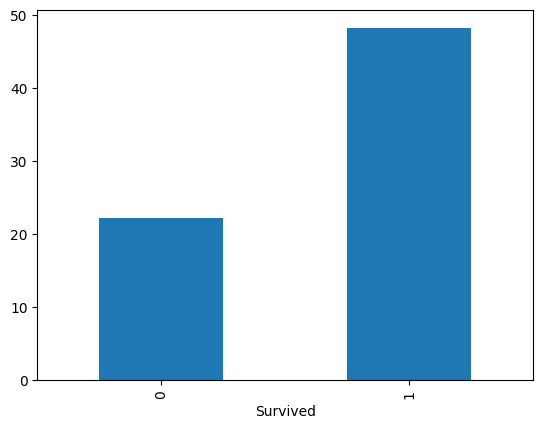

In [87]:
df.groupby('Survived')['Fare'].mean().plot(kind='bar')

This bar chart visualizes the **average fare** paid by passengers, separated by their **survival status** on the Titanic.

- The **blue bar (0)** represents the average fare paid by passengers who **did not survive**.
- The **orange bar (1)** represents the average fare paid by passengers who **survived**.

The chart indicates that, on average, passengers who survived paid a **higher fare** compared to those who did not survive. This suggests a potential correlation between the fare paid and survival, which could be linked to factors like passenger class.

In [88]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [89]:
# Dropping unnecessary column
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [90]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

label encoding--> Converting text based categorical feature to numeric feature

In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

Splitting data into training and testing set

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2,random_state=42)

**Feature Engineering**

In [94]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(score_func=chi2, k=5)
X_train_new = selector.fit_transform(X_train, y_train)
X_train_new

array([[  1.        ,   0.        ,  22.        , 151.55      ,
          2.        ],
       [  3.        ,   0.        ,  29.69911765,  14.4542    ,
          0.        ],
       [  3.        ,   1.        ,  32.        ,   7.925     ,
          2.        ],
       ...,
       [  1.        ,   0.        ,  48.        ,  25.9292    ,
          2.        ],
       [  3.        ,   0.        ,  21.        ,  34.375     ,
          2.        ],
       [  3.        ,   1.        ,  33.        ,   8.6542    ,
          2.        ]])

In [100]:
# Get mask of selected features
mask = selector.get_support()
selected_features = X_train.columns[mask]

print("Selected features:", selected_features.tolist())
X_train_new = pd.DataFrame(X_train_new, columns=selected_features)
X_train_new

Selected features: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']


,Pclass,Sex,Age,Fare,Embarked
0,1.0,0.0,22.000000,151.5500,2.0
1,3.0,0.0,29.699118,14.4542,0.0
2,3.0,1.0,32.000000,7.9250,2.0
3,3.0,0.0,29.699118,69.5500,2.0
4,3.0,1.0,14.000000,46.9000,2.0
...,...,...,...,...,...
706,3.0,1.0,29.699118,7.7750,2.0
707,3.0,1.0,25.000000,0.0000,2.0
708,1.0,0.0,48.000000,25.9292,2.0
709,3.0,0.0,21.000000,34.3750,2.0


# 🎯 Chi-Square Test for Feature Selection (With Mathematical Intuition)

The **Chi-Square (χ²) Test** is a statistical method used for **feature selection** when both the features and the target are **categorical** (or label-encoded). It helps identify which features are **most dependent** on the target variable.

---

## 📐 Intuition

The Chi-Square test checks whether the distribution of feature values is **independent** of the target classes. If they are **not independent**, then the feature likely helps in prediction.

If a feature and the target are independent, it means:
> Knowing the feature value gives no extra info about the target.

---

## 📊 Chi-Square Formula

\[
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
\]

- \( O_i \): Observed frequency (actual counts in your data)  
- \( E_i \): Expected frequency (if there was no relationship)  
- Large χ² → Feature is dependent on target → Keep it

---

## 🛠️ Implementation Steps

1. Ensure that all **feature values are non-negative** integers (e.g., use `LabelEncoder`).
2. Split data into **train/test** to avoid data leakage.
3. Apply `SelectKBest(score_func=chi2, k=n)` on **training data only**.
4. Use the same selector to **transform test data**.

---

## 🔢 Example Output

```python
array([
  [1., 0., 22., 151.55, 2.],
  [3., 0., 29.7, 14.45, 0.],
  ...
])


In [98]:
X_test_new = selector.transform(X_test)
# Get mask of selected features
mask = selector.get_support()
selected_test_features = X_test.columns[mask]

print("Selected features:", selected_test_features.tolist())

Selected features: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']


In [69]:
# Using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [102]:
model = LogisticRegression(
    C=1.0, # Using a single float value for C
    solver='saga',
    max_iter=200,
    random_state=42
)
model.fit(X_train_new,y_train)

LogisticRegression(max_iter=200, random_state=42, solver='saga')

In [104]:
from re import A
y_pred=model.predict(X_test_new)
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
acc=accuracy_score(y_test,y_pred)
print(acc)


              precision    recall  f1-score   support

           0       0.68      0.97      0.80       109
           1       0.86      0.28      0.42        69

    accuracy                           0.70       178
   macro avg       0.77      0.62      0.61       178
weighted avg       0.75      0.70      0.65       178

0.702247191011236


🎯 Classification Report Analysis

The classification report provides key metrics to evaluate the model's performance, focusing on our ability to predict survival.

- **Precision**: For each class (**0=Did not survive**, **1=Survived**), this metric tells us:
  * Of all instances predicted as positive (survived), what percentage were actually positive?
  * **Interpretation for the '1' (Survived) row**: Of all the people our model predicted would survive, this percentage actually did survive. A high precision for '1' means our model is good at avoiding false positives (predicting survival for someone who didn't).

- **Recall**: For each class, this metric tells us:
  * Of all actual positive instances (survived), what percentage did we correctly predict? (Also known as Sensitivity)
  * **Interpretation for the '1' (Survived) row**: Of all the people who actually survived, this percentage was correctly identified by our model. A high recall for '1' means our model is good at avoiding false negatives (failing to predict survival for someone who did).

- **F1-score**: The harmonic mean of Precision and Recall. It's a balanced metric.
  * **Interpretation**: A high F1-score indicates a good balance between precision and recall.

- **Support**: The number of actual occurrences of the class in the test set.
  * **Interpretation**: This tells us how many individuals in the test set belonged to each class (0 or 1).

- **Accuracy**: Overall percentage of correct predictions (both survived and not survived).
  * **Interpretation**: The percentage of the total test set predictions that were correct.

---

**Brief Result Summary:**

Based on the classification report:

- For predicting **Class 0 (Did not survive)**:
  - **Precision:** 0.68 - When the model predicts someone did not survive, it is correct 68% of the time.
  - **Recall:** 0.97 - The model correctly identifies 97% of all people who actually did not survive.
  - **F1-score:** 0.80 - A good balance between precision and recall for this class.
  - **Support:** 109 - There were 109 people who did not survive in the test set.

- For predicting **Class 1 (Survived)**:
  - **Precision:** 0.86 - When the model predicts someone survived, it is correct 86% of the time. This is quite good, meaning few false positives for survival.
  - **Recall:** 0.28 - The model only correctly identifies 28% of all people who actually survived. This is relatively low, indicating many false negatives (missed survivors).
  - **F1-score:** 0.42 - The lower F1-score reflects the poor recall for this class.
  - **Support:** 69 - There were 69 people who survived in the test set.

- Overall **Accuracy:** 0.70 - The model correctly predicted the outcome for 70% of the passengers in the test set.

**Conclusion:**
The model is much better at identifying passengers who **did not survive** (high Recall for class 0) than those who **did survive** (low Recall for class 1). While its precision for predicting survival (Class 1) is high (86%), it misses a large proportion of actual survivors. Depending on the goal (e.g., minimizing false positives vs. minimizing false negatives for survival), this model might need improvement, particularly in increasing its recall for the 'Survived' class.



Since we did not get a good result so we need to select another model.

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Setting hyperparameters
params={
    'criterion':['gini', 'logloss','entropy'],
    'max_depth':[10,40,80,120,150,200],
    'max_features':['auto','sqrt','log2'],
    'class_weight': ['balanced'], # Fixed the parameter name and format
    'random_state':[42]

}
# Using grid search CV for hyperparameter tuning
grid=GridSearchCV(DecisionTreeClassifier(),params,cv=5)
grid.fit(X_train_new,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'logloss', 'entropy'],
                         'max_depth': [10, 40, 80, 120, 150, 200],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [42]})

In [108]:
# Get the best model from GridSearchCV
best_dt_model = grid.best_estimator_

# Make predictions on the test set using the best model
y_pred_dt = best_dt_model.predict(X_test_new)

# Evaluate the model
print("Decision Tree Classifier Performance:")
print(classification_report(y_test, y_pred_dt))
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", acc_dt)

Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       109
           1       0.68      0.83      0.75        69

    accuracy                           0.78       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.78      0.78       178

Accuracy: 0.7808988764044944


In [110]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'random_state': 42}

**Explanation of the Result:**

The output shows the performance of a Decision Tree Classifier on the test set and the hyperparameters that resulted in the best performance based on the `GridSearchCV` process.

1.  **Decision Tree Classifier Performance:**
    *   This section provides a detailed breakdown of the model's performance using common classification metrics.
    *   **Precision:** For class 0 (did not survive), the precision is 0.87, meaning when the model predicts someone did not survive, it is correct 87% of the time. For class 1 (survived), the precision is 0.68, meaning when the model predicts someone survived, it is correct 68% of the time. This indicates the model is more precise at predicting non-survival.
    *   **Recall:** For class 0, the recall is 0.75, meaning the model correctly identifies 75% of all people who actually did not survive. For class 1, the recall is 0.83, meaning the model correctly identifies 83% of all people who actually survived. This shows the model is better at capturing actual survivors (higher recall for class 1) than the previous Logistic Regression model.
    *   **F1-score:** The F1-score is the harmonic mean of precision and recall. For class 0, it's 0.81, and for class 1, it's 0.75. These scores represent a balanced measure of the model's performance for each class.
    *   **Support:** The number of instances in the test set for each class: 109 for class 0 (did not survive) and 69 for class 1 (survived).
    *   **Accuracy:** The overall accuracy is 0.78. This means the model correctly predicted the survival status for 78% of the passengers in the test set.
    *   **Macro Avg:** The average of the metrics (precision, recall, f1-score) for each class, unweighted by support.
    *   **Weighted Avg:** The average of the metrics, weighted by the support for each class. This gives a better overall picture when classes are imbalanced (though in this test set, the imbalance isn't extreme).

Compared to the previous Logistic Regression model (which had an accuracy of 0.70), the Decision Tree Classifier with these tuned hyperparameters shows improved overall accuracy (0.78) and significantly better recall for the 'Survived' class (0.83 vs 0.28), although its precision for 'Survived' is lower (0.68 vs 0.86). This new Decision Tree model is better at identifying actual survivors.

2.  **Best Hyperparameters:**
    *   `{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 40, 'max_features': 'sqrt', 'random_state': 42}`
    *   These are the specific hyperparameter values that `GridSearchCV` found to yield the best performance (likely measured by the default scoring for classification, which is accuracy, on the cross-validation folds of the training data).

**Explanation of the Best Hyperparameters:**

*   `class_weight': 'balanced'`: This hyperparameter adjusts the weights of the classes inversely proportional to their frequencies in the training data. It's useful for handling imbalanced datasets (where one class has significantly more samples than the other). By giving more weight to the minority class (survived), the model is encouraged to pay more attention to predicting that class correctly, which often improves recall for the minority class. In this dataset, non-survivors were more frequent than survivors, so this helps the model not be biased towards predicting non-survival.
*   `criterion': 'gini'`: This is the function used to measure the quality of a split in the decision tree. 'gini' (Gini impurity) is a common measure of node purity. It calculates the probability of incorrectly classifying a randomly chosen element in the dataset if it were labeled randomly according to the distribution of labels in the node.
*   `max_depth': 40`: This is the maximum depth of the tree. A deep tree can capture complex patterns but is prone to overfitting. A `max_depth` of 40 is relatively high. Combined with `max_features`, the tree might not grow to its full depth in practice. Grid search found that this depth, within the tested range, performed best during cross-validation.
*   `max_features': 'sqrt'`: This is the number of features to consider when looking for the best split at each node. 'sqrt' (equivalent to `log2` before version 1.1 of scikit-learn, now strictly 'sqrt') means that at each split, the model considers a random subset of features equal to the square root of the total number of features. This helps prevent the tree from relying too heavily on any single feature and can make the model more robust and less prone to overfitting, especially with many features. In this case, you used 5 features (`Sex`, `Pclass`, `Age`, `Fare`, `Embarked`), so `sqrt(5)` is around 2.2, meaning it would likely consider 2 features at each split.
*   `random_state': 42`: This ensures reproducibility of the split when `max_features` is 'sqrt' or 'log2', as well as the overall training process. Setting this value means you will get the same result every time you run the fitting process with these hyperparameters.

This is an improved performance but we still want more so we are going to use tandom forest classifier

In [111]:
rf=RandomForestClassifier()
grfc=GridSearchCV(rf,params,cv=5)
grfc.fit(X_train_new,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'logloss', 'entropy'],
                         'max_depth': [10, 40, 80, 120, 150, 200],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [42]})

In [114]:
y_pred_rf=grfc.predict(X_test_new)
print("best params : ")
print(classification_report(y_test,y_pred_rf))
acc_rf=accuracy_score(y_test,y_pred_rf)
print(acc_rf)

best params : 
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       109
           1       0.77      0.83      0.80        69

    accuracy                           0.84       178
   macro avg       0.83      0.84      0.83       178
weighted avg       0.84      0.84      0.84       178

0.8370786516853933


**Explanation of the Random Forest Results (`best params : ` output)**

The output you provided is the `classification_report` and `accuracy_score` for the Random Forest Classifier after hyperparameter tuning using `GridSearchCV`.

- **Classification Report:**
    - **Class 0 (Did not survive):**
        - **Precision:** 0.88 - When the Random Forest model predicts someone did not survive, it is correct 88% of the time. This is very high.
        - **Recall:** 0.84 - The model correctly identifies 84% of all people who actually did not survive. This is also good.
        - **F1-score:** 0.86 - A strong balance between precision and recall for the non-survival class.
        - **Support:** 109 - The number of non-survivors in the test set.
    - **Class 1 (Survived):**
        - **Precision:** 0.77 - When the Random Forest model predicts someone survived, it is correct 77% of the time.
        - **Recall:** 0.83 - The model correctly identifies 83% of all people who actually survived. This is a significant improvement in recall for the survival class compared to the initial Logistic Regression model.
        - **F1-score:** 0.80 - A good balance between precision and recall for the survival class.
        - **Support:** 69 - The number of survivors in the test set.
    - **Accuracy:** 0.84 - The overall accuracy of the Random Forest model is 84%. This means it correctly predicted the survival status for 84% of the passengers in the test set.
    - **Macro Avg:** The unweighted average of metrics across both classes (0.83 for precision, 0.84 for recall, 0.83 for F1-score).
    - **Weighted Avg:** The average of metrics weighted by the number of samples in each class (0.84 for all metrics).

- **Accuracy Score:**
    - **0.8370786516853933**: This is the numerical value of the overall accuracy, which is approximately 0.84, matching the accuracy shown in the classification report.

**Comparison with the Decision Tree Classifier**

Let's compare the key metrics from the Random Forest results to the Decision Tree results you provided previously:

| Metric            | Class    | Random Forest | Decision Tree |
| :---------------- | :------- | :------------ | :------------ |
| **Precision**     | 0 (No Survive) | 0.88          | 0.87          |
|                   | 1 (Survived) | 0.77          | 0.68          |
| **Recall**        | 0 (No Survive) | 0.84          | 0.75          |
|                   | 1 (Survived) | 0.83          | 0.83          |
| **F1-score**      | 0 (No Survive) | 0.86          | 0.81          |
|                   | 1 (Survived) | 0.80          | 0.75          |
| **Accuracy**      | Overall  | 0.84          | 0.78          |

**Analysis of the Comparison:**

1.  **Overall Accuracy:** The Random Forest model achieves a higher overall accuracy (0.84) compared to the Decision Tree model (0.78). This indicates that the Random Forest model makes correct predictions more often across the entire test set.
2.  **Precision (Class 0 - Did Not Survive):** Both models are very good at correctly identifying passengers who did not survive when they predict non-survival (high precision for class 0). Random Forest is slightly better (0.88 vs 0.87).
3.  **Recall (Class 0 - Did Not Survive):** The Random Forest model is significantly better at identifying all passengers who actually did not survive (0.84 vs 0.75). It captures more of the true negatives.
4.  **Precision (Class 1 - Survived):** The Random Forest model has higher precision for predicting survival (0.77) than the Decision Tree (0.68). This means when the Random Forest predicts someone survived, it is more likely to be correct than the Decision Tree.
5.  **Recall (Class 1 - Survived):** Both models have the same recall for the 'Survived' class (0.83). This means both models are equally good at identifying actual survivors. Compared to the initial Logistic Regression model (recall 0.28), both the tuned Decision Tree and Random Forest show a dramatic improvement in capturing survivors.
6.  **F1-score:** The F1-scores for both classes are higher for the Random Forest model (0.86 and 0.80) compared to the Decision Tree (0.81 and 0.75). This indicates that the Random Forest provides a better balance between precision and recall for both the 'Did not survive' and 'Survived' classes.

**Conclusion:**

The Random Forest Classifier, after hyperparameter tuning, **outperforms** the tuned Decision Tree Classifier on this specific test set. It demonstrates higher overall accuracy and better performance across most individual metrics (precision and recall for both classes, and F1-scores), except for Recall for Class 1 (Survived), where they are equal.

The key advantages of the Random Forest over the single Decision Tree here are:

-   **Reduced Overfitting:** Random Forests are an ensemble method that builds multiple decision trees and averages their predictions. This bagging technique helps to reduce the variance and prevents the model from overfitting to the training data, leading to better generalization on unseen data (like your test set).
-   **Improved Robustness:** By considering random subsets of features at each split (`max_features='sqrt'`), the Random Forest trees are decorrelated, making the overall ensemble more robust.
-   **Higher Overall Performance:** The combination of multiple trees generally leads to a more stable and accurate model than a single decision tree, especially one that might have become complex.

In summary, the Random Forest model is the best performing model among the ones evaluated (Logistic Regression, tuned Decision Tree) based on the metrics presented on your test set.